## 2024 CVE CVSS Review 

In [1]:
%%capture
#!rm nvd.jsonl
#!wget -q https://nvd.handsonhacking.org/nvd.jsonl

In [2]:
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
import datetime
from datetime import date
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly
import warnings
import calplot
from itables import init_notebook_mode, show
import itables.options as opt

opt.dom = "tpir"
opt.style = "table-layout:auto;width:auto"
init_notebook_mode(all_interactive=True, connected=True)

@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))


logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)

In [3]:
row_accumulator = []
for filename in glob.glob('nvd.jsonl'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data:
            cve = entry['cve']['id']
            try:
                assigner = entry['cve']['sourceIdentifier']
            except KeyError:
                assigner = 'Missing_Data'
            try:
                published_date = entry['cve']['published']
            except KeyError:
                published_date = 'Missing_Data'
            try:
                attack_vector = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackVector']
            except KeyError:
                attack_vector = 'Missing_Data'
            try:
                attack_complexity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['attackComplexity']
            except KeyError:
                attack_complexity = 'Missing_Data'
            try:
                privileges_required = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['privilegesRequired']
            except KeyError:
                privileges_required = 'Missing_Data'
            try:
                user_interaction = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['userInteraction']
            except KeyError:
                user_interaction = 'Missing_Data'
            try:
                scope = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['scope']
            except KeyError:
                scope = 'Missing_Data'
            try:
                confidentiality_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['confidentialityImpact']
            except KeyError:
                confidentiality_impact = 'Missing_Data'
            try:
                integrity_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['integrityImpact']
            except KeyError:
                integrity_impact = 'Missing_Data'
            try:
                availability_impact = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['availabilityImpact']
            except KeyError:
                availability_impact = 'Missing_Data'
            try:
                base_score = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseScore']
            except KeyError:
                base_score = '0.0'
            try:
                base_severity = entry['cve']['metrics']['cvssMetricV31'][0]['cvssData']['baseSeverity']
            except KeyError:
                base_severity = 'Missing_Data'
            try:
                exploitability_score = entry['cve']['metrics']['cvssMetricV31'][0]['exploitabilityScore']
            except KeyError:
                exploitability_score = 'Missing_Data'
            try:
                impact_score = entry['cve']['metrics']['cvssMetricV31'][0]['impactScore']
            except KeyError:
                impact_score = 'Missing_Data'
            try:
                cwe = entry['cve']['weaknesses'][0]['description'][0]['value']
            except KeyError:
                cwe = 'Missing_Data'
            try:
                description = entry['cve']['descriptions'][0]['value']
            except IndexError:
                description = ''
            try: 
                vulnStatus = entry['cve']['vulnStatus']
            except IndexError:
                vulnStatus = ''  
            new_row = {
                'CVE': cve,
                'Published': published_date,
                'AttackVector': attack_vector,
                'AttackComplexity': attack_complexity,
                'PrivilegesRequired': privileges_required,
                'UserInteraction': user_interaction,
                'Scope': scope,
                'ConfidentialityImpact': confidentiality_impact,
                'IntegrityImpact': integrity_impact,
                'AvailabilityImpact': availability_impact,
                'BaseScore': base_score,
                'BaseSeverity': base_severity,
                'ExploitabilityScore': exploitability_score,
                'ImpactScore': impact_score,
                'CWE': cwe,
                'Description': description,
                'Assigner' : assigner,
                'Status': vulnStatus 
            }
            row_accumulator.append(new_row)
        nvd = pd.DataFrame(row_accumulator)

nvd = nvd[~nvd.Status.str.contains('Rejected')]
nvd['Published'] = pd.to_datetime(nvd['Published'])
thisyear = ((nvd['Published'] > '2024-01-01') & (nvd['Published']  < '2025-01-01'))
nvd = nvd.loc[thisyear]
nvd = nvd.sort_values(by=['Published'])
nvd = nvd.reset_index(drop=True)
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);
nvdcount = nvd['Published'].count()
nvdunique = nvd['Published'].nunique()
startdate = date(2024, 1, 1)
enddate  = date(2025,1,1)
numberofdays = enddate - startdate 
per_day = nvdcount/numberofdays.days

# Highest CVSS Scores

In [4]:
nvd.loc[nvd['BaseScore'] == 10.0]

CVE               Published AttackVector AttackComplexity PrivilegesRequired  ... ImpactScore             CWE                                        Description                         Assigner             Status
84     CVE-2023-48419 2024-01-02 19:15:11.280      NETWORK              LOW               NONE  ...         6.0         CWE-269  An attacker in the wifi vicinity of a target G...  dsap-vuln-management@google.com           Modified
106     CVE-2023-6339 2024-01-02 22:15:09.237      NETWORK              LOW               NONE  ...         6.0         CWE-311  Google Nest WiFi Pro root code-execution & use...  dsap-vuln-management@google.com           Modified
111    CVE-2023-48418 2024-01-02 23:15:11.000      NETWORK              LOW               NONE  ...         6.0         CWE-269   In checkDebuggingDisallowed of DeviceVersionF...  dsap-vuln-management@google.com           Modified
308    CVE-2022-46839 2024-01-05 11:15:09.433      NETWORK              LOW               NONE  ...         6.0         CWE-434  Unrestricted Upload of File with Dangerous Typ...             audit@patchstack.com           Modified
405    CVE-2024-22216 2024-01-08 07:15:11.547      NETWORK              LOW               NONE  ...         6.0  NVD-CWE-noinfo  In default installations of Microchip maxView ...                    cve@mitre.org           Modified
...               ...                     ...          ...              ...                ...  ...         ...             ...                                                ...                              ...                ...
38445  CVE-2024-54261 2024-12-13 15:15:30.210      NETWORK              LOW               NONE  ...         6.0          CWE-89  Improper Neutralization of Special Elements us...             audit@patchstack.com  Awaiting Analysis
39055   CVE-2023-4617 2024-12-19 10:15:13.147      NETWORK              LOW               NONE  ...         6.0         CWE-863  Incorrect authorization vulnerability in HTTP ...                      cvd@cert.pl  Awaiting Analysis
39887  CVE-2024-56799 2024-12-30 19:15:08.160      NETWORK              LOW               NONE  ...         5.8         CWE-306  Simofa is a tool to help automate static websi...   security-advisories@github.com  Awaiting Analysis
39954  CVE-2024-56046 2024-12-31 13:15:07.997      NETWORK              LOW               NONE  ...         6.0         CWE-434  Unrestricted Upload of File with Dangerous Typ...             audit@patchstack.com  Awaiting Analysis
39955  CVE-2024-56064 2024-12-31 13:15:08.157      NETWORK              LOW               NONE  ...         6.0         CWE-434  Unrestricted Upload of File with Dangerous Typ...             audit@patchstack.com  Awaiting Analysis

[231 rows x 18 columns]

In [5]:
nvd.loc[nvd['BaseScore'] == 10.0].describe()

Published  BaseScore
count                            231      231.0
mean   2024-07-19 02:26:40.689515008       10.0
min       2024-01-02 19:15:11.280000       10.0
25%    2024-04-11 14:45:06.870000128       10.0
50%    2024-07-18 17:15:04.369999872       10.0
75%       2024-10-29 08:45:11.920000       10.0
max       2024-12-31 13:15:08.157000       10.0
std                              NaN        0.0

## Lowest CVSS Score

In [6]:
nvd.sort_values(by='BaseScore').head(10)

CVE               Published      AttackVector AttackComplexity PrivilegesRequired  ... ImpactScore      CWE                                        Description                                 Assigner               Status
6146    CVE-2024-2365 2024-03-11 00:15:17.337          PHYSICAL             HIGH               HIGH  ...         1.4  CWE-916  A vulnerability classified as problematic was ...                            cna@vuldb.com    Awaiting Analysis
3400   CVE-2023-45716 2024-02-09 22:15:07.993          PHYSICAL             HIGH                LOW  ...         1.4  CWE-319  Sametime is impacted by sensitive information ...                            psirt@hcl.com             Modified
17228  CVE-2024-36119 2024-05-30 21:15:09.460             LOCAL             HIGH               HIGH  ...         1.4  CWE-312  Statamic is a, Laravel + Git powered CMS desig...           security-advisories@github.com    Awaiting Analysis
3820   CVE-2023-41090 2024-02-14 14:16:05.373             LOCAL             HIGH               HIGH  ...         1.4  CWE-421  Race condition in some Intel(R) MAS software b...                         secure@intel.com             Modified
18383  CVE-2024-21754 2024-06-11 15:16:03.433             LOCAL             HIGH               HIGH  ...         1.4  CWE-916  A use of password hash with insufficient compu...                       psirt@fortinet.com             Modified
34663  CVE-2024-52525 2024-11-15 17:15:23.150          PHYSICAL             HIGH               HIGH  ...         1.4  CWE-312  Nextcloud Server is a self hosted personal clo...           security-advisories@github.com  Undergoing Analysis
6929    CVE-2024-2567 2024-03-17 21:15:05.760          PHYSICAL              LOW               HIGH  ...         1.4  CWE-530  ** UNSUPPORTED WHEN ASSIGNED ** A vulnerabilit...                            cna@vuldb.com    Awaiting Analysis
6145    CVE-2024-2364 2024-03-10 23:15:54.423          PHYSICAL              LOW               HIGH  ...         1.4  CWE-530  A vulnerability classified as problematic has ...                            cna@vuldb.com    Awaiting Analysis
21371  CVE-2024-22477 2024-07-09 23:15:10.827  ADJACENT_NETWORK             HIGH               HIGH  ...         1.4   CWE-79  A cross-site scripting vulnerability exists in...  responsible-disclosure@pingidentity.com             Modified
24562  CVE-2023-20518 2024-08-13 17:15:19.330             LOCAL             HIGH               HIGH  ...         1.4  CWE-459  Incomplete cleanup in the ASP may expose the M...                            psirt@amd.com    Awaiting Analysis

[10 rows x 18 columns]

## CVSS Graph

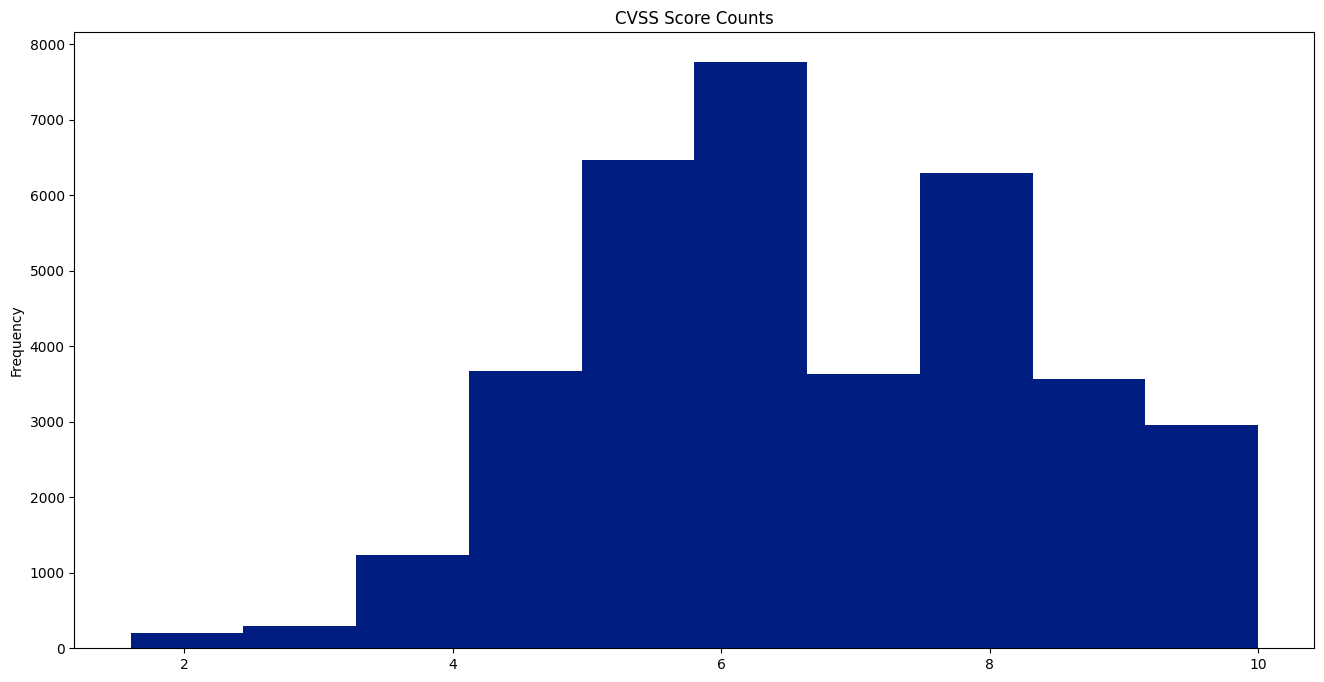

In [8]:
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);
nvd['BaseScore'].plot(kind="hist", title='CVSS Score Counts', color="#001d82", figsize=(16, 8)); 

## CVSS Averages

In [9]:
nvd.describe()

Published     BaseScore
count                          40009  36096.000000
mean   2024-07-05 05:45:18.930365696      6.678180
min       2024-01-01 08:15:36.087000      1.600000
25%    2024-04-09 19:15:37.489999872      5.500000
50%    2024-06-25 14:15:11.630000128      6.500000
75%    2024-10-10 18:15:08.183000064      7.800000
max       2024-12-31 23:15:41.553000     10.000000
std                              NaN      1.687577